# Library

In [28]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Prepocessing

In [29]:
# import data

# dataset 4
#url = "https://docs.google.com/spreadsheets/d/1WFkgdWGTW2siXvCtx0Ho8nRK1PQHD6CR/edit?usp=sharing&ouid=107188913217796843959&rtpof=true&sd=true"
# dataset 2 (kode_addres)
url = "https://docs.google.com/spreadsheets/d/1e_WmZ_rL6ps_cVAFCRsQun-FJJ38Q7Mi/edit?usp=sharing&ouid=107188913217796843959&rtpof=true&sd=true"
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url, parse_dates = True, index_col=0)
df.head()

,address,price,kamar,luas_bangunan,luas_lahan,luas_bangunan_m2,luas_lahan_m2,kode_address
title,,,,,,,,
Modern Residence Lowokwaru,Lowokwaru,560000000,2,65 m²,89 m²,65,89,24
RUMAH MEWAH SUKUN 2 LANTAI KOTA MALANG,Sukun,596000000,2,55 m²,69 m²,55,69,39
Dijual Rumah Cantik Perum Permata Jingga Lowokwaru Malang(OLX028),Lowokwaru,3200000000,4,230 m²,180 m²,230,180,24
Rumah 2 Lantai Araya,Pandanwangi,2250000000,4,160 m²,210 m²,160,210,34
Rumah Dekat Exit Toll strategis,Lowokwaru,500000000,3,1 m²,72 m²,1,72,24


In [30]:
df.describe()

,price,kamar,luas_bangunan_m2,luas_lahan_m2,kode_address
count,8.000000e+02,800.000000,800.00000,800.0000,800.000000
mean,2.118936e+09,4.045000,160.53125,169.5700,23.326250
std,4.040515e+09,3.056903,221.13218,248.1035,11.188556
min,9.000000e+07,1.000000,1.00000,1.0000,1.000000
25%,5.500000e+08,2.000000,54.00000,70.0000,16.000000
50%,9.500000e+08,3.000000,90.00000,96.0000,24.000000
75%,2.200000e+09,4.000000,182.50000,165.0000,32.000000
max,4.000000e+10,25.000000,3500.00000,2672.0000,48.000000


In [31]:
df.isnull().sum()

address             0
price               0
kamar               0
luas_bangunan       0
luas_lahan          0
luas_bangunan_m2    0
luas_lahan_m2       0
kode_address        0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Modern Residence Lowokwaru to Ijen Nirwana Residence G2 Malang
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   address           800 non-null    object
 1   price             800 non-null    int64 
 2   kamar             800 non-null    int64 
 3   luas_bangunan     800 non-null    object
 4   luas_lahan        800 non-null    object
 5   luas_bangunan_m2  800 non-null    int64 
 6   luas_lahan_m2     800 non-null    int64 
 7   kode_address      800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 56.2+ KB


<ipython-input-33-0fd66da79046>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi_pearson = df.corr()


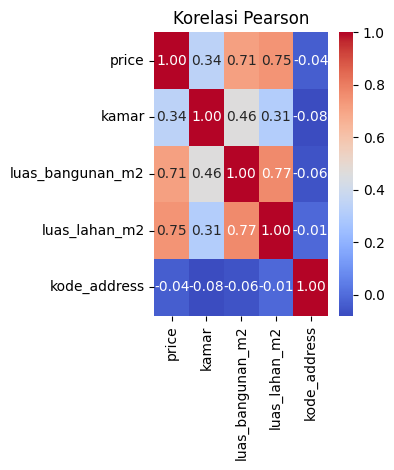

In [33]:
# Hitung korelasi antar atribut menggunakan korelasi Pearson
korelasi_pearson = df.corr()
#plt.figure(figsize=(6, 10))

plt.subplot(1, 2, 1)
sns.heatmap(korelasi_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Pearson')
plt.tight_layout()
plt.show()

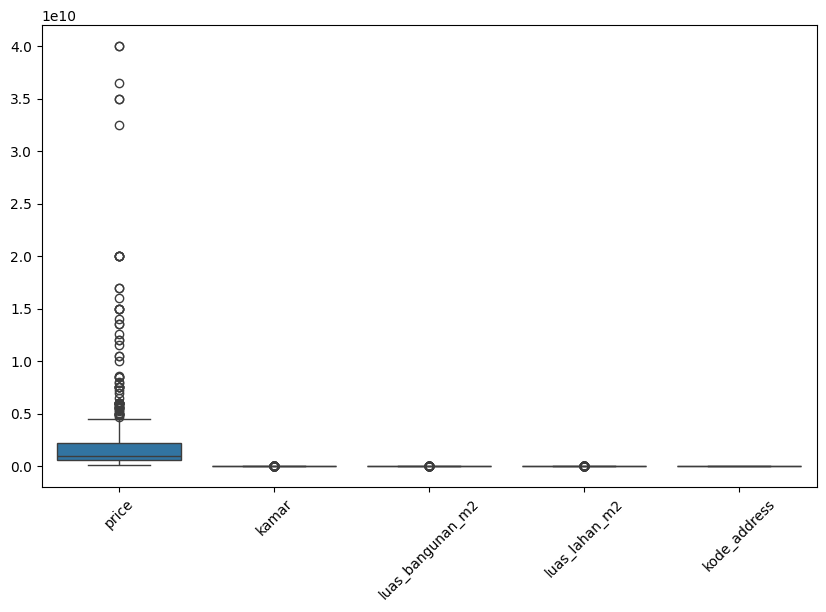

In [34]:
# 2. Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [35]:
# Hitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Hapus outlier
df_clean = df[~((df < batas_bawah) | (df > batas_atas)).any(axis=1)]

<ipython-input-35-d83b76cdc386>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-35-d83b76cdc386>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-35-d83b76cdc386>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df < batas_bawah) | (df > batas_atas)).any(axis=1)]


In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, Modern Residence Lowokwaru to Ijen Nirwana Residence G2 Malang
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   address           632 non-null    object
 1   price             632 non-null    int64 
 2   kamar             632 non-null    int64 
 3   luas_bangunan     632 non-null    object
 4   luas_lahan        632 non-null    object
 5   luas_bangunan_m2  632 non-null    int64 
 6   luas_lahan_m2     632 non-null    int64 
 7   kode_address      632 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 44.4+ KB


In [37]:
df_new = df_clean.drop(df.columns[[0, 3, 4]], axis=1)

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, Modern Residence Lowokwaru to Ijen Nirwana Residence G2 Malang
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             632 non-null    int64
 1   kamar             632 non-null    int64
 2   luas_bangunan_m2  632 non-null    int64
 3   luas_lahan_m2     632 non-null    int64
 4   kode_address      632 non-null    int64
dtypes: int64(5)
memory usage: 29.6+ KB


In [39]:
values = df_new.values

In [40]:
values.shape

(632, 5)

# Split data


In [41]:
features = ['kamar','luas_bangunan_m2','luas_lahan_m2', 'kode_address']
x = df_clean [features]
y = df_clean ['price']
x.shape, y.shape

((632, 4), (632,))

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70, test_size=0.2)
y_test.shape

(127,)

# Regresi Linear


In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

score = lr.score(x_test, y_test)
print ('Akurasi untuk tes model LR = ', score)

Akurasi untuk tes model LR =  0.7805224213068384


# Inputan Model

In [45]:
input_data = np.array([[8, 230, 300, 24]])
prediction = lr.predict(input_data)
print('Perkiraan harga yang dapat dijual', prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Perkiraan harga yang dapat dijual [3.33308802e+09]


# Save Model

In [46]:
import pickle

filename = 'predik_harga_rumah.sav'
pickle.dump(lr,open(filename,'wb'))